In [1]:
# import the libraries as shown below
from tensorflow import keras
import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '../input/indian-currency-notes-classifier/Train'
valid_path = '../input/indian-currency-notes-classifier/Test'

In [3]:
# useful for getting number of output classes
folders = glob('../input/indian-currency-notes-classifier/Train/*')

In [4]:
folders

[]

In [5]:

Classifier=keras.models.Sequential()

Classifier.add(keras.layers.Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

Classifier.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
Classifier.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

Classifier.add(keras.layers.Flatten())

Classifier.add(keras.layers.Dense(units = 128, activation = 'relu'))
Classifier.add(keras.layers.Dense(units = 7, activation = 'softmax'))

In [6]:
# tell the model what cost and optimization method to use
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [7]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,)

In [8]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 153 images belonging to 7 classes.


In [9]:
test_set = test_datagen.flow_from_directory('Test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 42 images belonging to 7 classes.


In [10]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\yashk\AppData\Local\Temp/ipykernel_5560/3819169585.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = Classifier.fit_generator(
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
5/5 [==============================] - 9s 2s/step - loss: 10.3207 - accuracy: 0.1438 - val_loss: 4.0252 - val_accuracy: 0.1429
Epoch 2/50
5/5 [==============================] - 7s 1s/step - loss: 3.1955 - accuracy: 0.1438 - val_loss: 2.2526 - val_accuracy: 0.1429
Epoch 3/50
5/5 [==============================] - 7s 1s/step - loss: 2.0187 - accuracy: 0.1503 - val_loss: 1.9438 - val_accuracy: 0.1905
Epoch 4/50
5/5 [==============================] - 8s 2s/step - loss: 1.9247 - accuracy: 0.1895 - val_loss: 1.9101 - val_accuracy: 0.1429
Epoch 5/50
5/5 [==============================] - 7s 1s/step - loss: 1.8679 - accuracy: 0.2026 - val_loss: 1.8553 - val_accuracy: 0.2381
Epoch 6/50
5/5 [==============================] - 7s 1s/step - loss: 1.7834 - accuracy: 0.2484 - val_loss: 1.7608 - val_accuracy: 0.1905
Epoch 7/50
5/5 [==============================] - 7s 1s/step - loss: 1.5277 - accuracy: 0.4052 - val_loss: 1.6005 - val_accuracy: 0.4762
Epoch 8/50
5/5 [========================

In [11]:
r.history

{'loss': [10.32065200805664,
  3.195544958114624,
  2.0187134742736816,
  1.9247019290924072,
  1.8679368495941162,
  1.783381462097168,
  1.5276567935943604,
  1.3555576801300049,
  1.1923822164535522,
  1.1553318500518799,
  1.0057575702667236,
  0.9280668497085571,
  0.8534634709358215,
  0.6962565183639526,
  0.6248250007629395,
  0.5980660915374756,
  0.5024097561836243,
  0.45512670278549194,
  0.35903945565223694,
  0.3784797787666321,
  0.35136678814888,
  0.3222067654132843,
  0.23914848268032074,
  0.2836019694805145,
  0.3456229865550995,
  0.2703916132450104,
  0.2444966435432434,
  0.17322632670402527,
  0.11696400493383408,
  0.13857005536556244,
  0.13720878958702087,
  0.13081903755664825,
  0.14090114831924438,
  0.10792273283004761,
  0.10494997352361679,
  0.05662092939019203,
  0.053423818200826645,
  0.034473493695259094,
  0.03144625574350357,
  0.050070952624082565,
  0.06171366199851036,
  0.10865446925163269,
  0.08954029530286789,
  0.04814112186431885,
  0.05

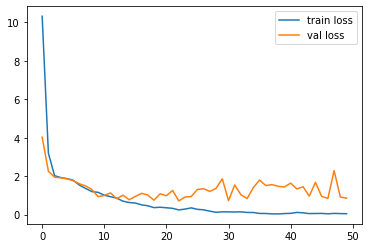

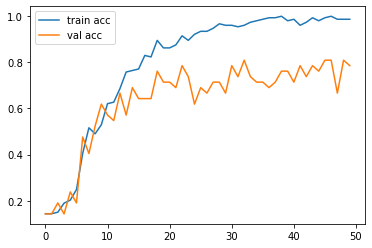

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
# save it as a h5 file
# from tensorflow.keras.models import load_model

Classifier.save('model_Classifier.h5')

In [14]:
y_pred = Classifier.predict(test_set)

In [15]:
y_pred

array([[3.88317130e-15, 9.99463141e-01, 1.68979875e-15, 1.60278191e-09,
        1.06074695e-13, 9.03752334e-06, 5.27867523e-04],
       [3.92401389e-10, 8.92461419e-01, 1.02780255e-08, 6.09895920e-08,
        1.05986044e-06, 1.00598298e-01, 6.93916762e-03],
       [3.74052004e-04, 1.02153643e-16, 4.19613515e-14, 1.84522293e-07,
        9.99625683e-01, 4.76757219e-12, 1.43282961e-07],
       [4.73468274e-01, 3.62855080e-03, 5.56086823e-02, 4.67171878e-01,
        1.44012238e-05, 3.72377326e-05, 7.09051237e-05],
       [2.18943015e-08, 9.97555614e-01, 2.11883293e-08, 1.99796591e-06,
        2.96002156e-07, 1.83413108e-03, 6.07913651e-04],
       [1.07904000e-03, 1.38448683e-10, 6.90241064e-09, 6.22260326e-04,
        9.98298228e-01, 8.81008333e-09, 4.53383592e-07],
       [5.64488000e-04, 3.59430451e-05, 9.99389768e-01, 8.12606049e-06,
        4.78974360e-11, 7.72137298e-07, 9.17545435e-07],
       [2.51077872e-04, 4.95968509e-11, 5.78352253e-12, 2.65730978e-05,
        9.99613702e-01, 2

In [16]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [17]:
y_pred

array([1, 1, 4, 0, 1, 4, 2, 4, 5, 0, 4, 6, 6, 6, 0, 2, 5, 3, 0, 1, 6, 6,
       2, 3, 5, 5, 3, 5, 6, 0, 0, 6, 4, 0, 1, 4, 4, 0, 0, 2, 5, 6],
      dtype=int64)

In [18]:
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image

In [19]:
model=keras.models.load_model('model_Classifier.h5')

In [20]:
img=keras.preprocessing.image.load_img('Test/1Hundrednote/1.jpg',target_size=(224,224))

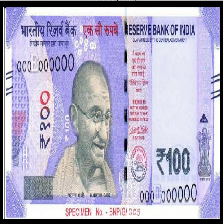

In [21]:
img

In [22]:
test_image=keras.preprocessing.image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [23]:
result = Classifier.predict(test_image)
result

array([[1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
a=np.argmax(model.predict(test_image), axis=1)

In [25]:
img_20=keras.preprocessing.image.load_img('Test/Twentynote/1.jpg',target_size=(224,224))

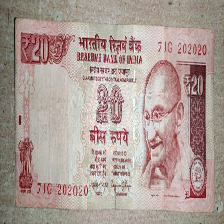

In [26]:
img_20

In [27]:
test_image=keras.preprocessing.image.img_to_array(img_20)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
result

array([[0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [28]:
import cv2
from cv2 import *
import os
import time

def imageCapture():
    cam = cv2.VideoCapture(0)
    time.sleep(15)
    result, image = cam.read()
    if result:
        path = os.getcwd()
        path = os.path.join(path, "Test")
        path = os.path.join(path, f"1.jpg")
        cv2.imshow("1", image)
        cv2.imwrite(path, image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("No image detected. Please! try again")



In [29]:
imageCapture()
img_20=keras.preprocessing.image.load_img('Test/1.jpg',target_size=(224,224))
test_image=keras.preprocessing.image.img_to_array(img_20)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
np.argmax(result)

6

In [30]:
img_100=keras.preprocessing.image.load_img('Test/1Hundrednote/1.jfif',target_size=(224,224))
test_image=keras.preprocessing.image.img_to_array(img_100)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
np.argmax(result)

0

In [31]:
img_50=keras.preprocessing.image.load_img('Test/Fiftynote/1.jfif',target_size=(224,224))
test_image=keras.preprocessing.image.img_to_array(img_50)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
np.argmax(result)

4

In [32]:
img_20=keras.preprocessing.image.load_img('Test/Twentynote/1.jfif',target_size=(224,224))
test_image=keras.preprocessing.image.img_to_array(img_20)
test_image=np.expand_dims(test_image, axis = 0)
result = Classifier.predict(test_image)
np.argmax(result)

6